In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

iris = load_iris(as_frame=True)
X_iris = iris.data[['petal length (cm)', 'petal width (cm)']].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)
tree_clf.score(X_iris, y_iris)

0.96

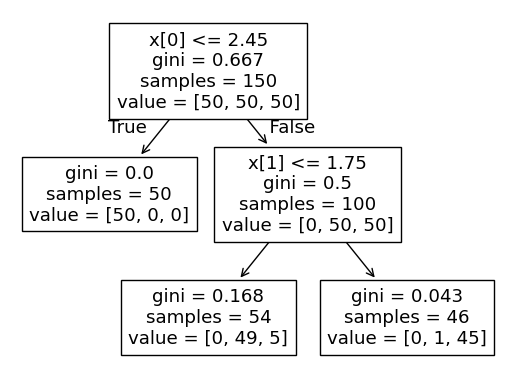

In [ ]:
tree.plot_tree(tree_clf);

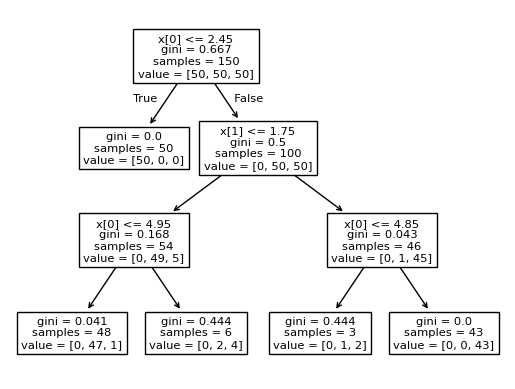

In [ ]:
tree_clf_depth_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_depth_3.fit(X_iris, y_iris)

tree.plot_tree(tree_clf_depth_3);

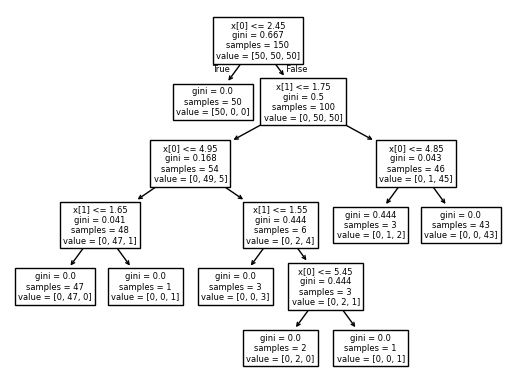

In [ ]:
tree_clf_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf_depth_5.fit(X_iris, y_iris)

tree.plot_tree(tree_clf_depth_5);

In [ ]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [ ]:
tree_clf.predict_proba([[100, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [ ]:
tree_clf.predict_proba([[1, 0.9]]).round(3)

array([[1., 0., 0.]])

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X_moons, y_moons = make_moons(n_samples=100, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42, min_samples_leaf=5)
tree_clf2 = DecisionTreeClassifier(random_state=42)

tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(random_state=42)

In [ ]:
tree_clf1.score(X_moons, y_moons), tree_clf2.score(X_moons, y_moons)

(0.97, 1.0)

# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)
tree_reg.score(X_quad, y_quad)

0.7966018355059642

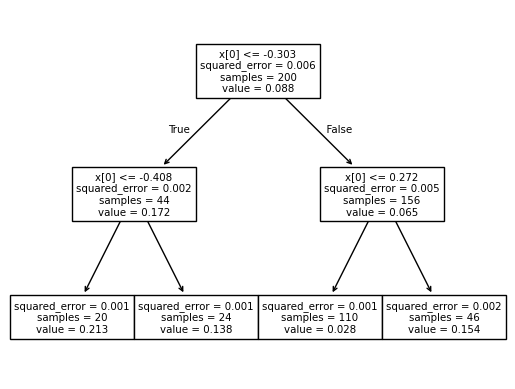

In [ ]:
tree.plot_tree(tree_reg);

In [ ]:
import matplotlib.pyplot as plt

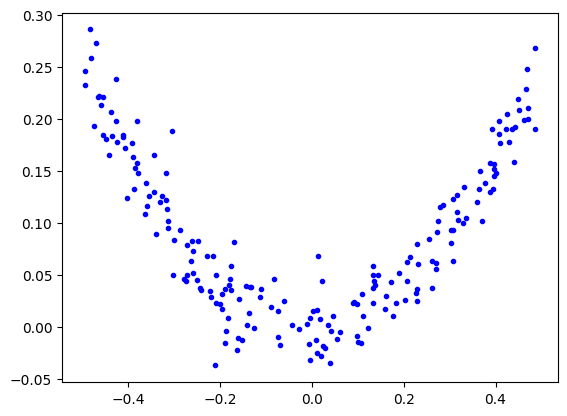

In [ ]:
plt.plot(X_quad, y_quad, 'b.');

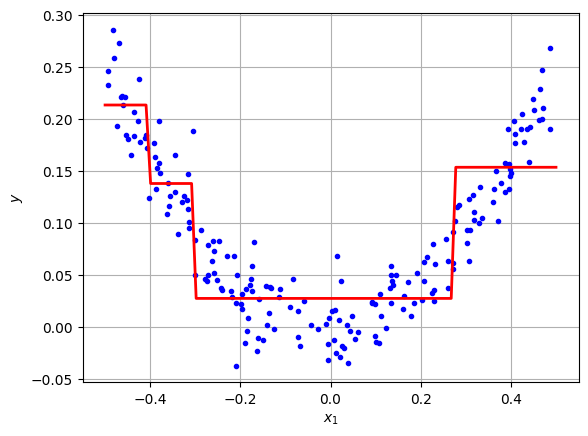

In [ ]:
X_new = np.linspace(-0.5, 0.5, 100).reshape(-1, 1)
y_pred = tree_reg.predict(X_new)

plt.plot(X_quad, y_quad, 'b.')
plt.plot(X_new, y_pred, 'r-', linewidth=2)
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.grid()
plt.show()

In [ ]:
tree_reg_max_depth_3 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg_max_depth_3.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

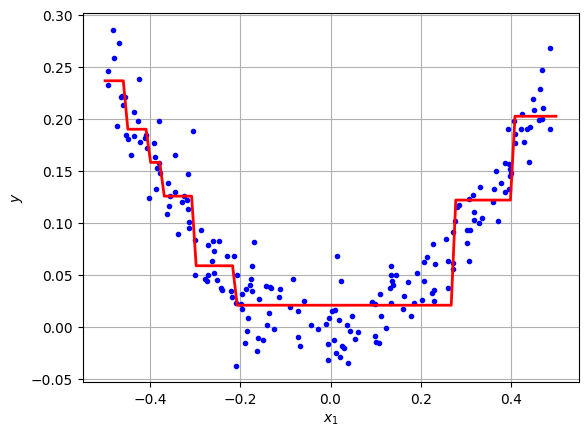

In [ ]:
X_new = np.linspace(-0.5, 0.5, 100).reshape(-1, 1)
y_pred = tree_reg_max_depth_3.predict(X_new)

plt.plot(X_quad, y_quad, 'b.')
plt.plot(X_new, y_pred, 'r-', linewidth=2)
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.grid()
plt.show()

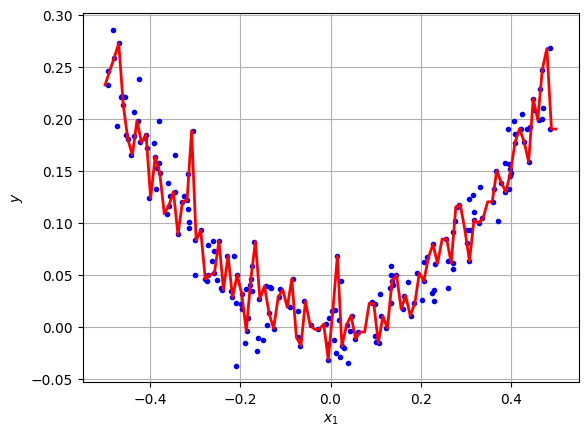

In [ ]:
tree_reg_depth_no_limit = DecisionTreeRegressor(random_state=42)
tree_reg_depth_no_limit.fit(X_quad, y_quad)

X_new = np.linspace(-0.5, 0.5, 100).reshape(-1, 1)
y_pred = tree_reg_depth_no_limit.predict(X_new)

plt.plot(X_quad, y_quad, 'b.')
plt.plot(X_new, y_pred, 'r-', linewidth=2)
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.grid()
plt.show()

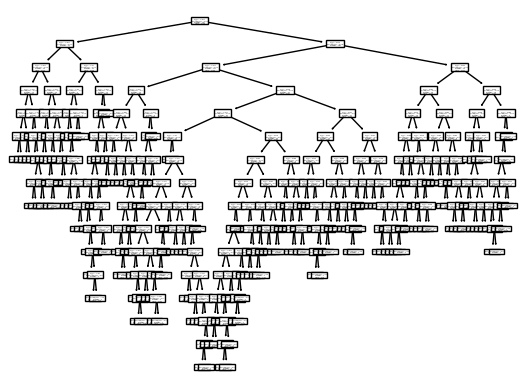

In [ ]:
tree.plot_tree(tree_reg_depth_no_limit);

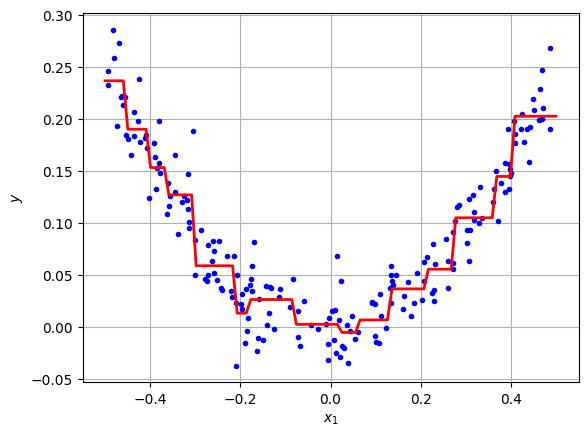

In [ ]:
tree_reg_min_samples_leaf_10 = DecisionTreeRegressor(min_samples_leaf=10, random_state=42)
tree_reg_min_samples_leaf_10.fit(X_quad, y_quad)

X_new = np.linspace(-0.5, 0.5, 100).reshape(-1, 1)
y_pred = tree_reg_min_samples_leaf_10.predict(X_new)

plt.plot(X_quad, y_quad, 'b.')
plt.plot(X_new, y_pred, 'r-', linewidth=2)
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.grid()
plt.show()

# Homework

In [ ]:
# Train and fine-tune a decision tree for the moons dataset by following these steps:


# Use make_moons(n_samples=10000, noise=0.4) to generate a moons dataset.

# Use train_test_split() to split the dataset into a training set and a test set.


# Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier.
# Hint: try various values for max_leaf_nodes.


# Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set.
# You should get roughly 85% to 87% accuracy.

In [ ]:
X, y = make_moons(n_samples=10_000, noise=0.4)

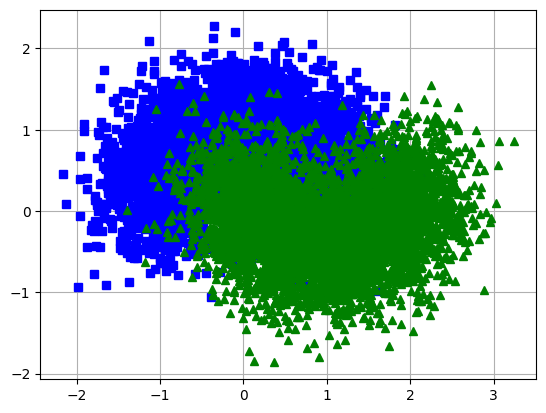

In [ ]:
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g^')
plt.grid()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=420, test_size=0.2)

In [ ]:
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier())

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.7955

In [ ]:
pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('decisiontreeclassifier', DecisionTreeClassifier())],
 'transform_input': None,
 'verbose': False,
 'standardscaler': StandardScaler(),
 'decisiontreeclassifier': DecisionTreeClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'decisiontreeclassifier__ccp_alpha': 0.0,
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': None,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_impurity_decrease': 0.0,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2,
 'decisiontreeclassifier__min_weight_fraction_leaf': 0.0,
 'decisiontreeclassifier__monotonic_cst': None,
 'decisiontreeclassifier__random_state': None,
 'decisiontreeclassifier__splitter': 'best'}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier.
# Hint: try various values for max_leaf_nodes.

params = {
          'decisiontreeclassifier__max_leaf_nodes': [None],
          'decisiontreeclassifier__max_depth': [5, 10, 20],
          'decisiontreeclassifier__min_samples_leaf': [1, 5, 10],
          'decisiontreeclassifier__min_samples_split': [2, 5, 10]
          }

grid_search_cv_decision_tree = GridSearchCV(estimator=pipe, cv=3, n_jobs=-1, param_grid=params)

grid_search_cv_decision_tree.fit(X_train, y_train)

grid_search_cv_decision_tree.score(X_test, y_test)


0.8595

In [ ]:
grid_search_cv_decision_tree.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5))])

In [ ]:
grid_search_cv_decision_tree.best_params_

{'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__max_leaf_nodes': 5,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2}

In [ ]:
# grid search again

params = {
          'decisiontreeclassifier__max_depth': [5, 6, 7],
          'decisiontreeclassifier__max_leaf_nodes': [3, 5, 6, 7, 10, 50],
          'decisiontreeclassifier__min_samples_leaf': [1],
          'decisiontreeclassifier__min_samples_split': [2, 3, 4, 5]
          }


grid_search_cv_decision_tree = GridSearchCV(estimator=pipe, cv=3, n_jobs=-1, param_grid=params)

grid_search_cv_decision_tree.fit(X_train, y_train)

grid_search_cv_decision_tree.score(X_test, y_test)

0.8645

In [ ]:
grid_search_cv_decision_tree.best_params_

{'decisiontreeclassifier__max_depth': 7,
 'decisiontreeclassifier__max_leaf_nodes': 50,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 5}

In [ ]:
# grid search again



In [ ]:
params = {
          'decisiontreeclassifier__max_depth': [7, 8, 9],
          'decisiontreeclassifier__max_leaf_nodes': [23, 24, 25, 26, 27],
          'decisiontreeclassifier__min_samples_leaf': [i for i in range(50, 62, 2)],
          'decisiontreeclassifier__min_samples_split': [2, 3, 4, 5]
          }


grid_search_cv_decision_tree = GridSearchCV(estimator=pipe, cv=3, n_jobs=-1, param_grid=params)

grid_search_cv_decision_tree.fit(X_train, y_train)

grid_search_cv_decision_tree.score(X_test, y_test)

0.8485

In [ ]:
grid_search_cv_decision_tree.best_params_

In [ ]:
grid_search_cv_decision_tree.best_estimator_

In [ ]:
grid_search_cv_decision_tree\
.score(X_train, y_train)